# LightGBM Models

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

DATA_DIR = Path("/content/drive/MyDrive/Work/Delivery/Current/Earthquake_damage/data")
SUBMISSIONS_DIR = Path(
    "drive/MyDrive/Work/Delivery/Current/Earthquake_damage/submissions"
)

from google.colab import drive

drive.mount("/content/drive")

train_values = pd.read_csv(DATA_DIR / "train_values.csv", index_col="building_id")
train_labels = pd.read_csv(DATA_DIR / "train_labels.csv", index_col="building_id")

Mounted at /content/drive


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
sns.set()

## Getting Set Up


In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 21077 (delta 64), reused 50 (delta 29), pack-reused 20975
Receiving objects: 100% (21077/21077), 16.66 MiB | 29.12 MiB/s, done.
Resolving deltas: 100% (15413/15413), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728 

In [ ]:
%cd /content/LightGBM

/content/LightGBM


In [ ]:
!mkdir build

In [ ]:
!cmake -DUSE_GPU=1

!make -j$(nproc)

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--

In [ ]:
!sudo apt-get -y install python-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython-all-dev python-all python-all-dev python-asn1crypto
  python-cffi-backend python-crypto python-cryptography python-dbus
  python-enum34 python-gi python-idna python-ipaddress python-keyring
  python-keyrings.alt python-pip-whl python-pkg-resources python-secretstorage
  python-setuptools python-six python-wheel python-xdg
Suggested packages:
  python-crypto-doc python-cryptography-doc python-cryptography-vectors
  python-dbus-dbg python-dbus-doc python-enum34-doc python-gi-cairo
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0 python-fs
  python-gdata python-keyczar python-secretstorage-doc python-setuptools-doc
The following NEW packages will be installed:
  libpython-all-dev python-all python-all-dev python-asn1crypto
  python-cffi-backend python-crypto python-cryptography python-dbus
  python-enum34 python-gi python-

In [ ]:
!sudo -H pip install setuptools pandas numpy scipy scikit-learn seaborn matplotlib -U

     |████████████████████████████████| 788kB 16.7MB/s 
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.5)
     |████████████████████████████████| 25.9MB 123kB/s 
     |████████████████████████████████| 22.2MB 1.2MB/s 
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.1)
     |████████████████████████████████| 11.6MB 53.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: setuptools 51.3.3
    Uninstalling setuptools-51.3.3:
      Successfully uninstalled setuptools-51.3.3
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installatio

In [ ]:
%cd /content/LightGBM/python-package

/content/LightGBM/python-package


In [ ]:
!sudo python setup.py install --precompile

running install
running build
running build_py
INFO:root:Generating grammar tables from /usr/lib/python3.6/lib2to3/Grammar.txt
INFO:root:Generating grammar tables from /usr/lib/python3.6/lib2to3/PatternGrammar.txt
creating build
creating build/lib
creating build/lib/lightgbm
copying lightgbm/__init__.py -> build/lib/lightgbm
copying lightgbm/engine.py -> build/lib/lightgbm
copying lightgbm/dask.py -> build/lib/lightgbm
copying lightgbm/libpath.py -> build/lib/lightgbm
copying lightgbm/plotting.py -> build/lib/lightgbm
copying lightgbm/sklearn.py -> build/lib/lightgbm
copying lightgbm/basic.py -> build/lib/lightgbm
copying lightgbm/callback.py -> build/lib/lightgbm
copying lightgbm/compat.py -> build/lib/lightgbm
running egg_info
creating lightgbm.egg-info
writing lightgbm.egg-info/PKG-INFO
writing dependency_links to lightgbm.egg-info/dependency_links.txt
writing requirements to lightgbm.egg-info/requires.txt
writing top-level names to lightgbm.egg-info/top_level.txt
writing manifest f

In [ ]:
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.shape

(182420, 1)

In [ ]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

In [ ]:
print("Loading data...")
# load or create your dataset
train_values = pd.read_csv(DATA_DIR / "train_values.csv", index_col="building_id")
train_labels = pd.read_csv(DATA_DIR / "train_labels.csv", index_col="building_id")

X_train, X_test, y_train, y_test = train_test_split(
    train_values, train_labels, test_size=0.3, random_state=123, stratify=train_labels
)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    "boosting_type": "gbdt",
    "objective": "classification",
    "metric": {"l2", "l1"},
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 0,
}

print("Starting training...")
# train
gbm = lgb.train(
    params, lgb_train, num_boost_round=20, valid_sets=lgb_eval, early_stopping_rounds=5
)

print("Saving model...")
# save model to file
gbm.save_model("model.txt")

print("Starting predicting...")
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print("The rmse of prediction is:", mean_squared_error(y_test, y_pred) ** 0.5)

Loading data...


FileNotFoundError: ignored

# Using Sklearn API and fucking off GPU

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

DATA_DIR = Path("/content/drive/MyDrive/Work/Delivery/Current/Earthquake_damage/data")
SUBMISSIONS_DIR = Path(
    "drive/MyDrive/Work/Delivery/Current/Earthquake_damage/submissions"
)

from google.colab import drive

drive.mount("/content/drive")

X = pd.read_csv(DATA_DIR / "train_values.csv", index_col="building_id")
y = pd.read_csv(DATA_DIR / "train_labels.csv", index_col="building_id")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
sns.set()

In [11]:
categorical_columns = X.select_dtypes(include="object").columns
X[categorical_columns] = X[categorical_columns].astype("category")

In [12]:
bool_columns = [col for col in X.columns if col.startswith("has")]
X[bool_columns] = X[bool_columns].astype("bool")

In [13]:
X = pd.get_dummies(X)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [8]:
steps = [("scaler", StandardScaler()), ("lgbm", LGBMClassifier(random_state=42))]

pipe = Pipeline(steps)
pipe

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [ ]:
param_grid = {"lgbm__n_estimators": [50, 100, 150], "lgbm__num_leaves": [20, 31, 40]}

gs = GridSearchCV(pipe, param_grid, cv=5, verbose=3, n_jobs=-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y
)

In [ ]:
pipe.fit(X_train, y_train.values.ravel())

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [ ]:
from sklearn.metrics import f1_score

y_pred = pipe.predict(X_test)
f1_score(y_test, y_pred, average="micro")

0.7088934651641703

In [ ]:
def make_submission(pipeline, title):
    """
    Given a trained pipeline object, use it to make predictions on the
    submission test set 'test_values.csv' and write them a csv in the submissions
    folder.
    """
    # Read in test_values csv and apply data preprocessing
    # note: will create a data preprocessing pipeline or function in future
    test_values = pd.read_csv(DATA_DIR / "test_values.csv", index_col="building_id")
    test_values[categorical_columns] = test_values[categorical_columns].astype(
        "category"
    )
    test_values[bool_columns] = test_values[bool_columns].astype("bool")
    test_values = pd.get_dummies(test_values)

    # Generate predictions using pipeline we pass in
    predictions = pipeline.predict(test_values)

    submission_format = pd.read_csv(
        DATA_DIR / "submission_format.csv", index_col="building_id"
    )

    my_submission = pd.DataFrame(
        data=predictions,
        columns=submission_format.columns,
        index=submission_format.index,
    )

    my_submission.to_csv(SUBMISSIONS_DIR / f"{title}.csv")

In [ ]:
make_submission(pipe, "LGBMClassifier defaults all features")

# Exploring Built Model

In [ ]:
data = {
    "features": X.columns,
    "importances": pipe.named_steps["lgbm"].feature_importances_,
}

feature_df = pd.DataFrame(data)

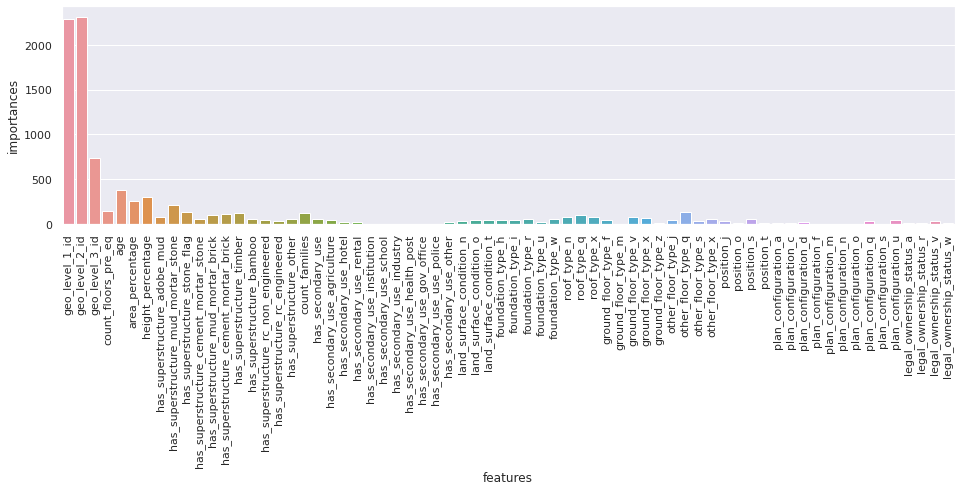

In [ ]:
fig, ax = plt.subplots(figsize=plt.figaspect(1 / 4))
sns.barplot(x="features", y="importances", data=feature_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
feature_df.sort_values("importances", ascending=False).tail(20)

,features,importances
51,position_o,14
67,legal_ownership_status_w,13
45,ground_floor_type_z,13
53,position_t,11
64,legal_ownership_status_a,9
54,plan_configuration_a,8
65,legal_ownership_status_r,8
55,plan_configuration_c,4
25,has_secondary_use_industry,3
42,ground_floor_type_m,2


In [ ]:
# Quite a lot are less than 10
feature_df.importances.value_counts()

0       10
23       3
53       2
8        2
37       2
35       2
13       2
34       2
46       2
30       1
41       1
296      1
38       1
32       1
19       1
3        1
143      1
14       1
11       1
2313     1
4        1
259      1
2        1
129      1
42       1
127      1
125      1
50       1
378      1
117      1
15       1
40       1
108      1
2283     1
101      1
739      1
98       1
215      1
9        1
80       1
79       1
73       1
72       1
67       1
59       1
58       1
56       1
55       1
52       1
47       1
Name: importances, dtype: int64

In [ ]:
# 14 features with importance above 100, let's train a model using just these
feature_df[feature_df.importances >= 100]

,features,importances
0,geo_level_1_id,2283
1,geo_level_2_id,2313
2,geo_level_3_id,739
3,count_floors_pre_eq,143
4,age,378
5,area_percentage,259
6,height_percentage,296
8,has_superstructure_mud_mortar_stone,215
9,has_superstructure_stone_flag,129
11,has_superstructure_mud_mortar_brick,101


# Model with Most Important 14 Features

In [ ]:
most_important_features = feature_df[feature_df.importances >= 100].features.to_numpy()

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

steps = [("scaler", StandardScaler()), ("lgbm", LGBMClassifier(random_state=42))]

model = Pipeline(steps)

scores = cross_val_score(
    model, X[most_important_features], y, scoring="f1_micro", cv=cv, n_jobs=-1
)

print("Accuracy: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

NameError: ignored

In [ ]:
param_grid = {"lgbm__n_estimators": [50, 100, 150], "lgbm__num_leaves": [20, 31, 40]}

gs = GridSearchCV(pipe, param_grid, cv=5, verbose=10, n_jobs=-1, scoring="f1_micro")

In [ ]:
gs.fit(X[most_important_features], y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expect

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lgbm',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_child_weight=0.001,
     

In [ ]:
# Seems like more estimators and more leaves is better
gs.best_params_

{'lgbm__n_estimators': 150, 'lgbm__num_leaves': 40}

In [ ]:
gs.best_score_

0.7153003955919739

In [ ]:
y_pred = gs.predict(X[most_important_features])
f1_score(y, y_pred, average="micro")

0.7231207861827084

In [5]:
def make_submission_top_14_features(pipeline, title):
    """
    Given a trained pipeline object, use it to make predictions on the
    submission test set 'test_values.csv' and write them a csv in the submissions
    folder.
    """
    # Read in test_values csv and apply data preprocessing
    # note: will create a data preprocessing pipeline or function in future
    test_values = pd.read_csv(DATA_DIR / "test_values.csv", index_col="building_id")
    test_values[categorical_columns] = test_values[categorical_columns].astype(
        "category"
    )
    test_values[bool_columns] = test_values[bool_columns].astype("bool")
    test_values = pd.get_dummies(test_values)
    test_values = test_values[most_important_features]

    # Generate predictions using pipeline we pass in
    predictions = pipeline.predict(test_values)

    submission_format = pd.read_csv(
        DATA_DIR / "submission_format.csv", index_col="building_id"
    )

    my_submission = pd.DataFrame(
        data=predictions,
        columns=submission_format.columns,
        index=submission_format.index,
    )

    my_submission.to_csv(SUBMISSIONS_DIR / f"{title}.csv")

In [ ]:
title = "Top 14 most informative features - minor hyperparameter tuning"
make_submission_top_14_features(gs, title)

# Intense Hyperparameter Tuning

In [ ]:
LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
param_grid = {
    "lgbm__n_estimators": [150, 175, 200],
    "lgbm__num_leaves": [40, 50, 60],
    #'lgbm__bosting_type': ['gbdt', 'dart', 'goss'],
    "lgbm__learning_rate": [0.01, 0.1, 1],
    "lgbm__min_split_gain": [0.0, 0.5],
    "lgbm__min_child_weight": [1e-3, 1e-4, 1e-2],
    "lgbm__min_child_samples": [10, 20, 30],
}

gs = GridSearchCV(pipe, param_grid, cv=2, verbose=10, n_jobs=-1, scoring="f1_micro")

In [ ]:
gs.fit(X[most_important_features], y)

Fitting 2 folds for each of 486 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 32

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lgbm',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_child_weight=0.001,
     

In [ ]:
gs.best_params_

{'lgbm__learning_rate': 0.1,
 'lgbm__min_child_samples': 30,
 'lgbm__min_child_weight': 0.001,
 'lgbm__min_split_gain': 0.0,
 'lgbm__n_estimators': 200,
 'lgbm__num_leaves': 60}

In [ ]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=30, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=200, n_jobs=-1,
                                num_leaves=60, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [ ]:
# This gave me a score of 0.7264 on the submission placing 518
gs.best_score_

0.7230747407901168

In [ ]:
y_pred = gs.predict(X[most_important_features])
f1_score(y, y_pred, average="micro")

0.7405919394016139

In [ ]:
make_submission_top_14_features(gs, "mid-level hyperparameter tuning")

0.13817017871432383

# More intense hypereparameter tuning

In [3]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "lgbm__n_estimators": np.arange(200, 410, 10),
    "lgbm__num_leaves": np.arange(60, 130, 10),
    "lgbm__bosting_type": ["gbdt", "dart", "goss"],
    "lgbm__learning_rate": [0.1, 0.2, 0.3],
    "lgbm__min_child_samples": np.arange(30, 100, 10),
}

rs = RandomizedSearchCV(
    pipe,
    param_dist,
    n_iter=300,
    cv=2,
    verbose=10,
    n_jobs=-1,
    scoring="f1_micro",
    random_state=42,
)

In [ ]:
rs.fit(X[most_important_features], y)

Fitting 2 folds for each of 300 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 31.5min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 52

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('lgbm',
                                              LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                                                             max_depth=-1,
                                                             min_child_samples=20,


In [ ]:
rs.best_params_

{'lgbm__bosting_type': 'goss',
 'lgbm__learning_rate': 0.2,
 'lgbm__min_child_samples': 40,
 'lgbm__n_estimators': 330,
 'lgbm__num_leaves': 90}

In [ ]:
rs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', bosting_type='goss',
                                class_weight=None, colsample_bytree=1.0,
                                importance_type='split', learning_rate=0.2,
                                max_depth=-1, min_child_samples=40,
                                min_child_weight=0.001, min_split_gain=0.0,
                                n_estimators=330, n_jobs=-1, num_leaves=90,
                                objective=None, random_state=42, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [ ]:
# Scoresd 0.7397 on submission - placed 331 (in the top 10%!!!!)
rs.best_score_

0.7333778463517757

In [ ]:
y_pred = rs.predict(X[most_important_features])
f1_score(y, y_pred, average="micro")

0.7901926700204527

In [ ]:
make_submission_top_14_features(rs, "random search hyperparameter tuning LightGBM")

In [ ]:
import pickle

MODEL_DIR = Path(
    "/content/drive/MyDrive/Work/Delivery/Current/Earthquake_damage/models"
)
pkl_filename = MODEL_DIR / "random search LightGBM.pkl"
with open(pkl_filename, "wb") as f:
    pickle.dump(rs, f)

# Even more intense RandomizedSearch

In [14]:
from sklearn.model_selection import RandomizedSearchCV
import pickle

param_dist = {
    "lgbm__n_estimators": np.arange(200, 410, 10),
    "lgbm__num_leaves": np.arange(60, 130, 10),
    "lgbm__bosting_type": ["goss"],
    "lgbm__learning_rate": [0.1, 0.2, 0.25, 0.3],
    "lgbm__min_child_samples": np.arange(30, 100, 10),
}

rs = RandomizedSearchCV(
    pipe,
    param_dist,
    n_iter=500,
    cv=2,
    verbose=10,
    n_jobs=-1,
    scoring="f1_micro",
    random_state=42,
)

most_important_features = [
    "geo_level_1_id",
    "geo_level_2_id",
    "geo_level_3_id",
    "count_floors_pre_eq",
    "age",
    "area_percentage",
    "height_percentage",
    "has_superstructure_mud_mortar_stone",
    "has_superstructure_stone_flag",
    "has_superstructure_mud_mortar_brick",
    "has_superstructure_cement_mortar_brick",
    "has_superstructure_timber",
    "count_families",
    "other_floor_type_q",
]

rs.fit(X[most_important_features], y)

print("Best params")
print(rs.best_params_)

print("Best score")
print(rs.best_score_)

print("F1 score on entire dataset")
y_pred = rs.predict(X[most_important_features])
f1_score(y, y_pred, average="micro")

print("Creating submission csv...")
make_submission_top_14_features(rs, "0102 GOSS random search tuning LightGBM")

print("Writing model to hard drive...")
MODEL_DIR = Path(
    "/content/drive/MyDrive/Work/Delivery/Current/Earthquake_damage/models"
)
pkl_filename = MODEL_DIR / "GOSS random search LightGBM.pkl"
with open(pkl_filename, "wb") as f:
    pickle.dump(rs, f)

print("Finished")

Fitting 2 folds for each of 500 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 43.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 50

Best params
{'lgbm__num_leaves': 120, 'lgbm__n_estimators': 240, 'lgbm__min_child_samples': 40, 'lgbm__learning_rate': 0.2, 'lgbm__bosting_type': 'goss'}
Best score
0.7334968053159259
F1 score on entire dataset
Creating submission csv...
Writing model to hard drive...
Finished


# Exploring KFold Cross Val

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LGBMClassifier()

scores = cross_val_score(model, X, y, scoring="f1_micro", cv=cv, n_jobs=-1)

print("Accuracy: %.3f (%.3f)" % (np.mean(scores), np.std(scores)))

Accuracy: 0.708 (0.003)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


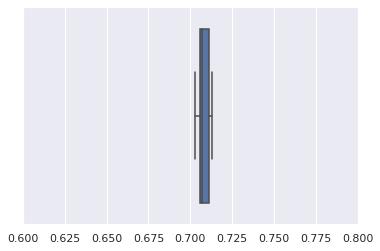

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(scores)
plt.xlim([0.6, 0.8])
plt.show()

We know that the default values with all features then are fine. 

Obvs we want to explore the dataset. 